In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(randomForest)
library(caret)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [ ]:
data <- read.csv("webtraffic.csv")

In [ ]:
data$lag1 <- lag(data$Sessions, 1)
data$lag2 <- lag(data$Sessions, 2)
data <- na.omit(data)

In [ ]:
set.seed(123)
train_index <- createDataPartition(data$Sessions, p = 0.8, list = FALSE)
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

In [ ]:
rf_model <- randomForest(Sessions ~ lag1 + lag2, data = train_data)

In [ ]:
predictions <- predict(rf_model, newdata = test_data)

In [ ]:
results <- data.frame(Actual = test_data$Sessions, Predicted = predictions)

In [ ]:
rmse <- sqrt(mean((results$Actual - results$Predicted)^2))
cat("Root Mean Squared Error (RMSE):", rmse, "\n")

Root Mean Squared Error (RMSE): 3749559 


In [ ]:
r_squared <- cor(results$Actual, results$Predicted)^2
cat("R-squared:", r_squared, "\n")

R-squared: 0.999983 


In [ ]:
library(ggplot2)

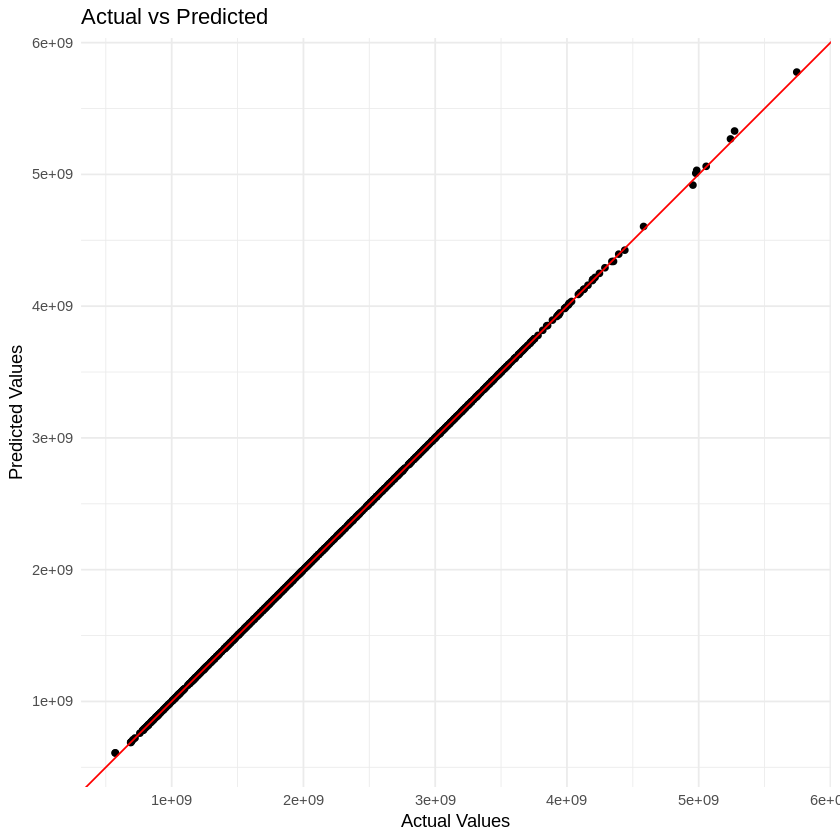

In [ ]:
ggplot(results, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = 'red') +
  theme_minimal() +
  labs(title = "Actual vs Predicted", x = "Actual Values", y = "Predicted Values")

In [ ]:
results$residuals <- results$Actual - results$Predicted

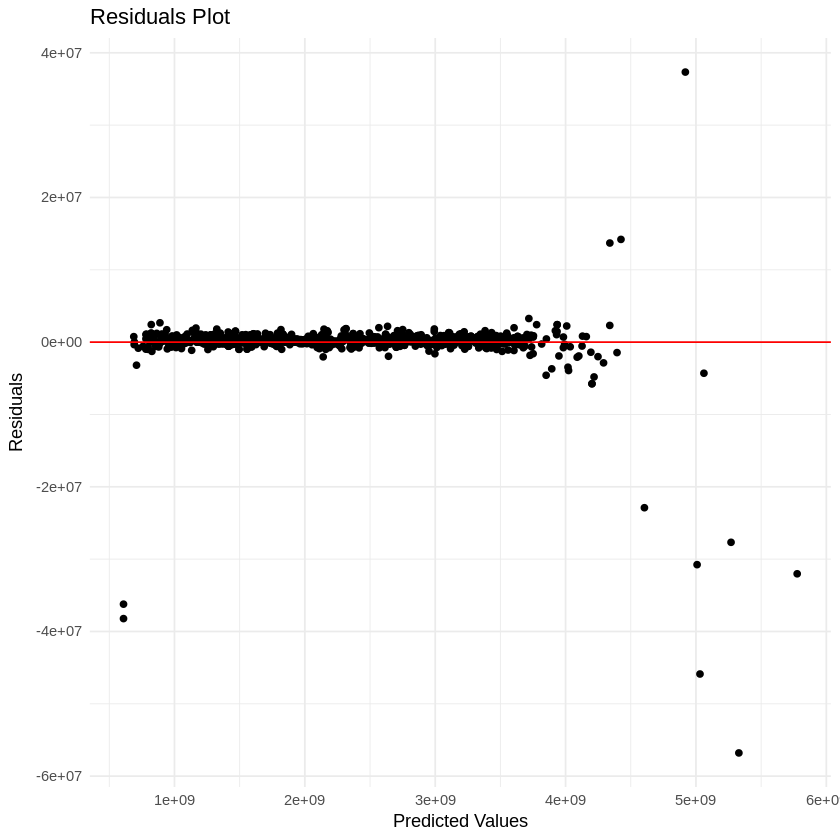

In [ ]:
ggplot(results, aes(x = Predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0, color = 'red') +
  theme_minimal() +
  labs(title = "Residuals Plot", x = "Predicted Values", y = "Residuals")

In [ ]:
install.packages("keras")
library(keras)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [ ]:
set.seed(42)
train_indices <- sample(1:nrow(data), 0.8 * nrow(data))
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

In [ ]:
train_data <- scale(train_data)
test_data <- scale(test_data)

In [ ]:
x_train <- as.matrix(train_data[, -ncol(train_data)])
y_train <- as.matrix(train_data[, ncol(train_data)])

In [ ]:
x_test <- as.matrix(test_data[, -ncol(test_data)])
y_test <- as.matrix(test_data[, ncol(test_data)])

In [ ]:
head(data)

,Hour.Index,Sessions,lag1,lag2
,<int>,<dbl>,<dbl>,<dbl>
1,0,1418159421,1418159421,1418159421
2,1,1113769116,1113769116,1113769116
3,2,919158921,919158921,919158921
4,3,822352824,822352824,822352824
5,4,735526737,735526737,735526737
6,5,798400800,798400800,798400800


In [ ]:
shape<-dim(data)

In [ ]:
cat("The shape of the dataset is:", shape[1], "rows and", shape[2], "columns.\n")

The shape of the dataset is: 4896 rows and 4 columns.


In [ ]:
library(keras)

In [ ]:
data$lag1 <- scale(data$lag1)
data$lag2 <- scale(data$lag2)

In [ ]:
x <- as.matrix(data[, c("lag1", "lag2")])
y <- as.matrix(data$Sessions)

In [ ]:
set.seed(123)
train_indices <- sample(1:nrow(data), 0.8 * nrow(data))
x_train <- x[train_indices, ]
y_train <- y[train_indices]
x_test <- x[-train_indices, ]
y_test <- y[-train_indices]

In [ ]:
model <- keras_model_sequential()

In [ ]:
data <- read.csv("webtraffic.csv")

In [ ]:
library(keras)
packageVersion("keras")
packageVersion("tensorflow")


[1] ‘2.15.0’

[1] ‘2.16.0’